STEPS
1. LOAD THE DATA
2. CREATE THE MODEL
3. TRAIN THE MODEL ON THE DATA
4. PREDICT WITH SOME NEW DATA
5. EVALUATE THE RESULTS(TRAIN TEST SPLIT)
6. SAVE THE MODEL 
7. EXPORT MODEL TO AN APPLICATION

**HOUSE PRICE PREDICTION SYSTEM USING MACHINE LEARNING**

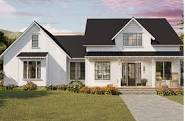

**Linear Regression - Finding a linear relationship between features and target variables. PREDICT HOUSE PRICES- House value is simply more than location and square footage.**

* Flask==1.1.1
* gunicorn==19.9.0
* itsdangerous==1.1.0
* Jinja2==2.10.1
* MarkupSafe==1.1.1
* Werkzeug==0.15.5
* numpy>=1.9.2
* scipy>=0.15.1
* scikit-learn>=0.18
* matplotlib>=1.4.3
* pandas>=0.19
 

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

dataset = pd.read_csv('../input/housepricedata/train_hp.csv')

dataset = dataset.dropna()


X = dataset.iloc[:, : 29]

y = dataset.iloc[:, -1]


#Splitting Training and Test Set
#Since we have a very small dataset, we will train our model with all availabe data.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting model with trainig data
regressor.fit(X, y)

# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[60,65,8450,7,5,2003,2003,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,2003,2,548,0,0,0,2,2008]]))


In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Predicted House Price $ {}'.format(output))

@app.route('/predict_api',methods=['POST'])
def predict_api():
    '''
    For direct API calls trought request
    '''
    data = request.get_json(force=True)
    prediction = model.predict([np.array(list(data.values()))])

    output = prediction[0]
    return jsonify(output)

if __name__ == "__main__":
    app.run(debug=True)